# Chapter 11: Neural nets

In [45]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
# DATA = Path('C:/Users/profm/OneDrive/teaching/DS110/dmba')
DATA = Path('/Users/limin/OneDrive/teaching/DS110/dmba/')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

## Table 11.2
## Figure 11.4

In [47]:
example_df = pd.read_csv(DATA / 'TinyData.csv')
example_df
predictors = ['Fat', 'Salt']
outcome = 'Acceptance'
X = example_df[predictors]
y = example_df[outcome]

In [48]:
y

0       like
1    dislike
2    dislike
3    dislike
4       like
5       like
Name: Acceptance, dtype: object

In [49]:
classes = sorted(y.unique())

In [50]:
classes

['dislike', 'like']

In [51]:
# 3 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
# hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
# The ith element represents the number of neurons in the ith hidden layer.
# It is length = n_layers - 2, because the number of your hidden layers is the total number of 
# layers n_layers minus 1 for the input layer, minus 1 for the output layer.
# In the (default) case of (100,), it means one hidden layer of 100 units (neurons).
# For 3 hidden layers of, say, 100, 50, and 25 units (nodes) respectively, it would be
# hidden_layer_sizes = (100, 50, 25)

clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([
    example_df,
    pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1))

Intercepts
[array([0.13368043, 4.07247549, 7.00768105]), array([14.30748672])]
Weights
[array([[ -1.3065648 ,  -4.20427796, -13.29587332],
       [ -0.04399729,  -4.91606922,  -6.03356987]]), array([[ -0.27348314],
       [ -9.01211575],
       [-17.63504687]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [52]:
example_df

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like
5,6,0.3,0.8,like


In [53]:
# Pretty print layers
for i, (weights, intercepts) in enumerate(zip(clf.coefs_, clf.intercepts_)):
    print('Hidden layer' if i == 0 else 'Output layer', '{0[0]} => {0[1]}'.format(weights.shape))
    print(' Intercepts:\n ', intercepts)
    print(' Weights:')
    for weight in weights:
        print(' ', weight)
    print()


Hidden layer 2 => 3
 Intercepts:
  [0.13368043 4.07247549 7.00768105]
 Weights:
  [ -1.3065648   -4.20427796 -13.29587332]
  [-0.04399729 -4.91606922 -6.03356987]

Output layer 3 => 1
 Intercepts:
  [14.30748672]
 Weights:
  [-0.27348314]
  [-9.01211575]
  [-17.63504687]



## Table 11.3

In [54]:
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 1.0000)

        Prediction
 Actual dislike    like
dislike       3       0
   like       0       3


## Table 11.6 (corrected)

In [108]:
accidents_df = pd.read_csv(DATA / 'accidentsnn.csv')
accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')
accidents_df.ALCHL_I = accidents_df.ALCHL_I.astype('category')
# ALCOHOL_I    Alcohol involved = 1, not involved = 2
# SUR_CON      Surface conditions (1=dry, 2=wet, 3=snow/slush, 4=ice, 5=sand/dirt/oil, 8=other, 9=unknown)
# MAX_SEV_IR   0=no injury, 1=non-fatal inj., 2=fatal inj.

In [109]:
accidents_df

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL,MAX_SEV_IR
0,2,0,1,1,0
1,2,1,1,1,2
2,1,0,1,1,0
3,2,0,2,2,1
4,2,1,1,2,1
...,...,...,...,...,...
994,2,0,1,1,0
995,2,0,1,1,0
996,1,1,1,2,1
997,1,0,1,3,2


In [110]:
# convert the categorical data into dummy variables
# exclude the column for SUR_COND 9 = unknown
processed = pd.get_dummies(accidents_df, columns=['SUR_COND', 'ALCHL_I'])
processed.columns

Index(['PROFIL_I_R', 'VEH_INVL', 'MAX_SEV_IR', 'SUR_COND_1', 'SUR_COND_2',
       'SUR_COND_3', 'SUR_COND_4', 'SUR_COND_9', 'ALCHL_I_1', 'ALCHL_I_2'],
      dtype='object')

In [111]:
processed = processed.drop(columns=['SUR_COND_9', 'ALCHL_I_2'])
outcome = 'MAX_SEV_IR'
predictors = [c for c in processed.columns if c != outcome]
# partition data

X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

<pre>
solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

</pre>

<pre>
learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
Learning rate schedule for weight updates.

‘constant’ is a constant learning rate given by ‘learning_rate_init’.

‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

Only used when solver='sgd'.

learning_rate_init: float, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
</pre>

In [112]:
y

0      0
1      2
2      0
3      1
4      1
      ..
994    0
995    0
996    1
997    2
998    0
Name: MAX_SEV_IR, Length: 999, dtype: category
Categories (3, int64): [0, 1, 2]

In [113]:
train_y

371    0
45     0
560    2
590    0
419    0
      ..
767    2
72     2
908    0
235    0
37     0
Name: MAX_SEV_IR, Length: 599, dtype: category
Categories (3, int64): [0, 1, 2]

In [114]:
X

,PROFIL_I_R,VEH_INVL,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,ALCHL_I_1
0,0,1,1,0,0,0,0
1,1,1,1,0,0,0,0
2,0,1,1,0,0,0,1
3,0,2,0,1,0,0,0
4,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...
994,0,1,1,0,0,0,0
995,0,1,1,0,0,0,0
996,1,2,1,0,0,0,1
997,0,3,1,0,0,0,1


In [115]:
train_X

,PROFIL_I_R,VEH_INVL,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,ALCHL_I_1
371,0,1,1,0,0,0,0
45,0,1,1,0,0,0,0
560,0,1,0,1,0,0,0
590,0,1,1,0,0,0,1
419,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...
767,1,1,1,0,0,0,0
72,1,1,1,0,0,0,0
908,0,1,1,0,0,0,0
235,0,1,1,0,0,0,0


In [116]:
# training performance (use idxmax to revert the one-hotencoding)
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 0.8715)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 172   8
     2  30  38  19


In [117]:
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 115   4
     2  24  25  13


In [118]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=500,
              random_state=1, solver='lbfgs')

## Grid Search

#### Note how to choose the size of hidden layer in Chapter 11.4: A rule of thumb is to start with p (number of predictors) nodes and gradually decrease or increase while checking for overfitting. Make sure you your search grid for "hidden_layer_sizes" covers the number of predictors (p) and beyond when using GridSearchCV as shown below.

In [119]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

# The grid.best_score_ is the average of all cv folds for a single combination of 
# the parameters you specify in the tuned_params.
# In order to access other relevant details about the grid searching process, 
# you can look at the grid.cv_results_ attribute.
# From the documentation of GridSearchCV:
# cv_results_ : dict of numpy (masked) ndarrays
# A dict with keys as column headers and values as columns, 
# that can be imported into a pandas DataFrame
# It contains keys like 'split0_test_score', 'split1_test_score' , 
# 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 
# 'split1_train_score', 'mean_train_score', etc, which gives additional 
# information about the whole execution.

Best score:  0.8614285714285714
Best parameters:  {'hidden_layer_sizes': 1}


In [120]:
gridSearch.cv_results_

{'mean_fit_time': array([0.02014794, 0.02054276, 0.04196701, 0.02538257, 0.0385159 ,
        0.03461776, 0.04089479, 0.03447695, 0.05108099, 0.08586392,
        0.05650558, 0.0566596 , 0.12906499, 0.09232836, 0.10659981,
        0.09058599, 0.09932342, 0.09294348, 0.09198656]),
 'std_fit_time': array([0.0075582 , 0.00492917, 0.02677634, 0.00792821, 0.01450386,
        0.01101463, 0.0161624 , 0.01031212, 0.01233425, 0.04384139,
        0.01887696, 0.01998243, 0.05951231, 0.0257268 , 0.06387201,
        0.03622821, 0.01719653, 0.01984118, 0.00793365]),
 'mean_score_time': array([0.00198665, 0.00264482, 0.00077758, 0.00131645, 0.00070419,
        0.00069537, 0.00069895, 0.00091934, 0.00071502, 0.00151987,
        0.00092702, 0.00125985, 0.0007082 , 0.00069499, 0.00091281,
        0.000911  , 0.00103874, 0.00073695, 0.00071683]),
 'std_score_time': array([9.79065604e-04, 1.34325265e-03, 5.19801934e-05, 6.86872375e-04,
        2.81667512e-05, 2.68314028e-05, 2.12621256e-05, 4.18219054e-04,


In [121]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         1         0.861429        0.006801
1                         2         0.859748        0.008483
2                         3         0.861415        0.007112
3                         4         0.861415        0.007112
4                         5         0.859748        0.006647
5                         6         0.858081        0.007747
6                         7         0.859734        0.010222
7                         8         0.856401        0.010135
8                         9         0.859748        0.008483
9                        10         0.849748        0.009143
10                       11         0.856401        0.013640
11                       12         0.853081        0.011389
12                       13         0.859748        0.012462
13                       14         0.853081        0.006810
14                       15         0.854748        0.006872
15                      

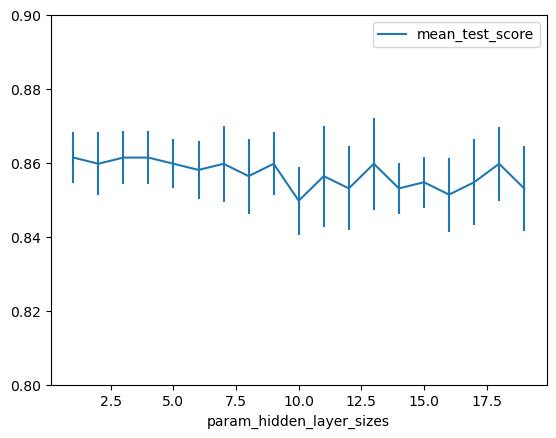

In [122]:
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                                                   y='mean_test_score', yerr='std_test_score', 
                                                   ylim=(0.8, 0.9))
import matplotlib.pylab as plt
plt.show()

In [123]:
# train neural network with 1 nodes in the hidden layer, increase default max_iter from 200 to 500
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', max_iter=500,
                    random_state=1)
clf.fit(train_X, train_y)


MLPClassifier(activation='logistic', hidden_layer_sizes=1, max_iter=500,
              random_state=1, solver='lbfgs')

In [124]:
# training performance (use idxmax to revert the one-hot-encoding)
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8664)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 180   0
     2  30  49   8
Confusion Matrix (Accuracy 0.8550)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 119   0
     2  24  33   5


## Table 11.6

## Fitting class probabilities separately

In [125]:
processed

,PROFIL_I_R,VEH_INVL,MAX_SEV_IR,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,ALCHL_I_1
0,0,1,0,1,0,0,0,0
1,1,1,2,1,0,0,0,0
2,0,1,0,1,0,0,0,1
3,0,2,1,0,1,0,0,0
4,1,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
994,0,1,0,1,0,0,0,0
995,0,1,0,1,0,0,0,0
996,1,2,1,1,0,0,0,1
997,0,3,2,1,0,0,0,1


In [126]:
accidents_df = pd.read_csv(DATA / 'accidentsnn.csv')
input_vars = ['ALCHL_I', 'PROFIL_I_R', 'VEH_INVL']

accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')
accidents_df.ALCHL_I = accidents_df.ALCHL_I.astype('category')
# convert the categorical data into dummy variables
processed = pd.get_dummies(accidents_df)
# drop the column for SUR_COND 9 = unknown
# processed = processed.drop(columns=['SUR_COND_9'])
processed = processed.drop(columns=['SUR_COND_9', 'ALCHL_I_2'])
outcome = ['MAX_SEV_IR_0', 'MAX_SEV_IR_1', 'MAX_SEV_IR_2']
predictors = [c for c in processed.columns if c not in outcome]
classes = sorted(outcome)

# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes, increase default max_iter from 200 to 300
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=300,
                    random_state=1)
clf.fit(train_X, train_y)

# training performance (use idxmax to revert the one-hot-encoding)
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
classificationSummary(train_y.idxmax(axis=1), trainPrediction, class_names=classes)

# validation performance
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
classificationSummary(valid_y.idxmax(axis=1), validPrediction, class_names=classes)

Confusion Matrix (Accuracy 0.8731)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          172            8
MAX_SEV_IR_2           31           37           19
Confusion Matrix (Accuracy 0.8625)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            1          115            3
MAX_SEV_IR_2           24           26           12


In [127]:
X

,PROFIL_I_R,VEH_INVL,ALCHL_I_1,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4
0,0,1,0,1,0,0,0
1,1,1,0,1,0,0,0
2,0,1,1,1,0,0,0
3,0,2,0,0,1,0,0
4,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...
994,0,1,0,1,0,0,0
995,0,1,0,1,0,0,0
996,1,2,1,1,0,0,0
997,0,3,1,1,0,0,0


In [128]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=500,
              random_state=1, solver='lbfgs')

## Grid search

In [129]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# Note how to choose the size of hidden layer in Chapter 11.4: 
# A rule of thumb is to start with p (number of predictors) nodes and 
# gradually decrease or increase while checking for overfitting. 
# Make sure you your search grid for "hidden_layer_sizes" covers 
# the number of predictors (p) and beyond when using GridSearchCV as shown below

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

# The grid.best_score_ is the average of all cv folds for a single combination of 
# the parameters you specify in the tuned_params.
# In order to access other relevant details about the grid searching process, 
# you can look at the grid.cv_results_ attribute.
# From the documentation of GridSearchCV:
# cv_results_ : dict of numpy (masked) ndarrays
# A dict with keys as column headers and values as columns, 
# that can be imported into a pandas DataFrame
# It contains keys like 'split0_test_score', 'split1_test_score' , 
# 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 
# 'split1_train_score', 'mean_train_score', etc, which gives additional 
# information about the whole execution.

Best score:  0.8664145658263305
Best parameters:  {'hidden_layer_sizes': 8}


In [130]:
gridSearch.cv_results_

{'mean_fit_time': array([0.03893352, 0.05721612, 0.07020164, 0.04897547, 0.07917404,
        0.06339917, 0.04302979, 0.04668632, 0.06917892, 0.10629201,
        0.08814354, 0.08897581, 0.12412496, 0.10757427, 0.10260973,
        0.15360637, 0.13192735, 0.12256427, 0.08094563]),
 'std_fit_time': array([0.01358208, 0.0494621 , 0.01918959, 0.01750337, 0.02983362,
        0.0250329 , 0.01481566, 0.01708778, 0.02602545, 0.02185056,
        0.03724726, 0.01396834, 0.05269675, 0.07132166, 0.02146397,
        0.07255431, 0.05252943, 0.05441037, 0.01841573]),
 'mean_score_time': array([0.00161786, 0.00154119, 0.00109987, 0.00218267, 0.00101686,
        0.00179925, 0.00102587, 0.00133038, 0.00099149, 0.00097923,
        0.0016871 , 0.00143671, 0.00098643, 0.00192018, 0.00138826,
        0.00143008, 0.0013886 , 0.00101757, 0.00103245]),
 'std_score_time': array([3.16000003e-04, 7.43537540e-04, 7.51762778e-05, 6.63790370e-04,
        2.37343271e-05, 7.67415693e-04, 3.97427109e-05, 6.85837505e-04,


In [131]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         1         0.841401        0.009144
1                         2         0.859734        0.025691
2                         3         0.858067        0.018506
3                         4         0.856401        0.024550
4                         5         0.853081        0.022155
5                         6         0.863081        0.015680
6                         7         0.859734        0.025691
7                         8         0.866415        0.012147
8                         9         0.849720        0.026535
9                        10         0.854734        0.023491
10                       11         0.851415        0.024966
11                       12         0.856401        0.020882
12                       13         0.848053        0.029209
13                       14         0.848053        0.024559
14                       15         0.844720        0.022265
15                      

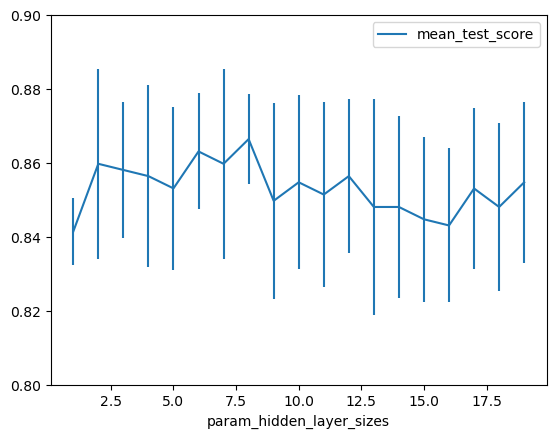

In [132]:
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                                                   y='mean_test_score', yerr='std_test_score', 
                                                   ylim=(0.8, 0.9))
plt.show()

In [133]:
# train neural network with 8 hidden nodes, increase default max_iter from 200 to 500
clf = MLPClassifier(hidden_layer_sizes=(8), activation='logistic', solver='lbfgs', max_iter=500,
                    random_state=1)
clf.fit(train_X, train_y)

# training performance (use idxmax to revert the one-hot-encoding)
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
classificationSummary(train_y.idxmax(axis=1), trainPrediction, class_names=classes)

# validation performance
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
classificationSummary(valid_y.idxmax(axis=1), validPrediction, class_names=classes)

Confusion Matrix (Accuracy 0.8765)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          172            8
MAX_SEV_IR_2           31           35           21
Confusion Matrix (Accuracy 0.8700)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            0          114            5
MAX_SEV_IR_2           24           22           16


In [134]:
# Example for MinMaxScaler()
#Create new data
new_data = pd.DataFrame(np.array([[8,20],[11,2],[5,3]]))
new_data

,0,1
0,8,20
1,11,2
2,5,3


In [135]:
# Create a Scaler for the new data
scaler_new_data = MinMaxScaler() 
# Trasform new data in the [0-1] range
scaled_new_data = scaler_new_data.fit_transform(new_data)
scaled_new_data

array([[0.5       , 1.        ],
       [1.        , 0.        ],
       [0.        , 0.05555556]])

In [136]:
# Inverse transform new data from [0-1] to [min, max] of data
inver_new_data = scaler_new_data.inverse_transform(scaled_new_data)
inver_new_data

array([[ 8., 20.],
       [11.,  2.],
       [ 5.,  3.]])

In [137]:
new_data = np.array([[8,20],[11,2],[5,3]])
new_data

array([[ 8, 20],
       [11,  2],
       [ 5,  3]])

In [138]:
# Create a Scaler for the new data
scaler_new_data = MinMaxScaler() 
# Trasform new data in the [0-1] range
scaled_new_data = scaler_new_data.fit_transform(new_data)
scaled_new_data

array([[0.5       , 1.        ],
       [1.        , 0.        ],
       [0.        , 0.05555556]])

In [139]:
# Inverse transform new data from [0-1] to [min, max] of data
inver_new_data = scaler_new_data.inverse_transform(scaled_new_data)
inver_new_data

array([[ 8., 20.],
       [11.,  2.],
       [ 5.,  3.]])